<a href="https://colab.research.google.com/github/SubhamZap/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

# **Business Problem Analysis**

Indian cuisine consists of a variety of regional and traditional cuisines native to the Indian subcontinent. With every state, you can find something different to love. Besides traditional North Indian and South Indian food, the food culture is heavily inspired by and evolved around various civilizations. To say that Indians are food lovers would be an understatement. The restaurant business in India has been booming and people even like to celebrate small occasions of their lives with good food and great ambiance. The number of restaurant are increasing day by day. This industry hasn't been saturated yet. And new restaurants are opening every day. However it has become difficult for them to compete with already established restaurants. The key issues that continue to pose a challenge to them include high real estate costs, rising food costs, shortage of quality manpower, fragmented supply chain and over-licensing. This Zomato data aims at analysing demography of the location. Most importantly it will help new restaurants in deciding their theme, menus, cuisine, cost etc for a particular location. The dataset also contains reviews for each of the restaurant which will help in finding overall rating for the place.

In this notebook I will try analyzing the Buisness Problem of Zomato and create a practical recommendation system for users.

The problem statement here has two datasets for us to work on:



*   Zomato Restaurant Names and Metadata

*   Zomato Restaurant Reviews


To assure Zomato's success it is important for the company to analyze its datasets and make appropriate strategic decisions. The problem statement here asks us to cluster the restaurants to help customers find the best restaurants in their city and according to their taste and understand the fields they are lagging in. This will help Zomato in building a good recommendation system for their customers. Do a cost-benefit analysis using the cuisines and costs of the restaurants. In order to understand fields that need to be worked upon, it is important to do sentiment analysis to get an idea about how people really feel about a particular restaurant. To identify the industry critics and especially work on their reviews to build a reputation worth praising.

In [647]:
# Importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [564]:
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [565]:
# Loading metadata dataset

meta_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant Clustering and Sentiment Analysis/Zomato Restaurant names and Metadata.csv')
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [566]:
# Loading review dataset

review_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant Clustering and Sentiment Analysis/Zomato Restaurant reviews.csv')
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [567]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [568]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [569]:
meta_df.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [570]:
review_df.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


# **Data Cleaning**

In [571]:
# Checking for null values in meta_df

meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

Dropping null values in collections means we will be losing half of the observations, so we won't be removing null values. Instead we can remove the column 'collection' as we won't make any significant impact in our analysis. 

Timings have one null value which could be dropped.

In [572]:
# Dropping collections and null value from Timings

meta_df.drop(['Collections'], axis= 1, inplace= True)
meta_df.dropna(inplace = True)
meta_df.isnull().sum()

Name        0
Links       0
Cost        0
Cuisines    0
Timings     0
dtype: int64

In [573]:
# Checking for null values in review_df

review_df.isna().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [574]:
# Dropping null values in reviews_df

review_df.dropna(axis = 0, inplace= True)

In [575]:
# Checking again

review_df.isna().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [576]:
review_df.shape

(9955, 7)

So, not much data is lost.

In [577]:
# Checking for duplicate values in meta_df

meta_df[meta_df.duplicated()]

,Name,Links,Cost,Cuisines,Timings


In [578]:
# Dropping all duplicated values

review_df.drop_duplicates(inplace= True)

In [579]:
# Checking for duplicate values in review_df

review_df[review_df.duplicated()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures


In [580]:
review_df.shape

(9955, 7)

Now, all the null and duplicate values have been removed.

# **Feature Engineering**

## Meta_df

In [581]:
# Changing all column names to lowercase

meta_df.columns = meta_df.columns.str.lower()

In [582]:
meta_df.columns

Index(['name', 'links', 'cost', 'cuisines', 'timings'], dtype='object')

In [583]:
# Value count for cost

meta_df.cost.value_counts

<bound method IndexOpsMixin.value_counts of 0        800
1        800
2      1,300
3        800
4      1,200
       ...  
100      600
101      200
102      500
103      250
104    1,700
Name: cost, Length: 104, dtype: object>

In [584]:
# Change the data type of cost

meta_df.cost = meta_df.cost.str.replace(",","").astype('int64')

In [585]:
meta_df.cost

0       800
1       800
2      1300
3       800
4      1200
       ... 
100     600
101     200
102     500
103     250
104    1700
Name: cost, Length: 104, dtype: int64

We can drop links column as it won't be very helpful in data analysis

In [586]:
# Dropping links column

meta_df.drop(['links'], axis= 1, inplace= True)

In [587]:
meta_df.shape

(104, 4)

In [588]:
meta_df.cuisines[0:5]

0    Chinese, Continental, Kebab, European, South I...
1                       Biryani, North Indian, Chinese
2         Asian, Mediterranean, North Indian, Desserts
3    Biryani, North Indian, Chinese, Seafood, Bever...
4    Asian, Continental, North Indian, Chinese, Med...
Name: cuisines, dtype: object

In [589]:
# cuisine column converted to list

meta_df['cuisines'] = meta_df['cuisines'].str.replace(' ','')
meta_df['cuisines'] = meta_df['cuisines'].str.split(',')

In [590]:
meta_df['cuisines']

0      [Chinese, Continental, Kebab, European, SouthI...
1                        [Biryani, NorthIndian, Chinese]
2          [Asian, Mediterranean, NorthIndian, Desserts]
3      [Biryani, NorthIndian, Chinese, Seafood, Bever...
4      [Asian, Continental, NorthIndian, Chinese, Med...
                             ...                        
100                                    [FastFood, Salad]
101                                     [Bakery, Mithai]
102                      [NorthIndian, Biryani, Chinese]
103                                           [FastFood]
104                    [Thai, Asian, Chinese, Malaysian]
Name: cuisines, Length: 104, dtype: object

In [591]:
meta_df.timings.unique()

array(['12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)', '11 AM to 11 PM',
       '11:30 AM to 4:30 PM, 6:30 PM to 11 PM', '12 Noon to 2 AM',
       '12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12noon to 12midnight (Fri-Sat)',
       '12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30PM (Mon, Tue, Wed, Thu, Sun), 12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 12Midnight (Fri-Sat)',
       '7 AM to 10 PM', '12 Noon to 12 Midnight',
       '10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri-Sun)',
       '12 Noon to 3:30 PM, 7 PM to 10:30 PM',
       '12 Noon to 3:30 PM, 6:30 PM to 11:30 PM', '11:30 AM to 1 AM',
       '12noon to 12midnight (Mon-Sun)',
       '12 Noon to 4:30 PM, 6:30 PM to 11:30 PM', '12 Noon to 10:30 PM',
       '12 Noon to 11 PM', '12:30 PM to 10 PM (Tue-Sun), Mon Closed',
       '11:30 AM to 3 PM, 7 PM to 11 PM',
       '11am to 11:30pm (Mon, Tue, Wed, Thu, Sun), 11am to 12midnight (Fri-Sat)',
       '10 AM to 5 AM',
       '12 Noon to 12 Midnight (Mon-Thu, Sun), 12 Noon to 1 AM (Fri-S

Upon analyzing the unique values in the timings columns, it can be concluded that the restaurants are more or less open at the same timings and don't really provide a considerable variation in order to cluster the restaurants.

In [592]:
# Dropping timings column

meta_df.drop(['timings'], axis= 1, inplace= True)

In [593]:
meta_df.head()

,name,cost,cuisines
0,Beyond Flavours,800,"[Chinese, Continental, Kebab, European, SouthI..."
1,Paradise,800,"[Biryani, NorthIndian, Chinese]"
2,Flechazo,1300,"[Asian, Mediterranean, NorthIndian, Desserts]"
3,Shah Ghouse Hotel & Restaurant,800,"[Biryani, NorthIndian, Chinese, Seafood, Bever..."
4,Over The Moon Brew Company,1200,"[Asian, Continental, NorthIndian, Chinese, Med..."


## **Review_df**

In [594]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [595]:
# Changing all column names to lowercase

review_df.columns = review_df.columns.str.lower()

In [596]:
review_df.columns

Index(['restaurant', 'reviewer', 'review', 'rating', 'metadata', 'time',
       'pictures'],
      dtype='object')

In [597]:
review_df.rating.value_counts()

5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: rating, dtype: int64

One rating is a string type ('Like'), we can assign it to mean value

In [598]:
# Assign like value to mean value of rating

review_df['rating'] = review_df['rating'].str.replace('Like', '4')
review_df['rating'] = review_df['rating'].astype('float64')

In [599]:
# Time column expanded to year, month, day and hour of the day

review_df['time'] = pd.to_datetime(review_df['time'])
review_df['year'] = pd.DatetimeIndex(review_df['time']).year
review_df['month'] = pd.DatetimeIndex(review_df['time']).month
review_df['day'] = pd.DatetimeIndex(review_df['time']).day
review_df['hour'] = pd.DatetimeIndex(review_df['time']).hour

In [600]:
# Dropping time column

review_df.drop(['time'], axis= 1, inplace= True)

In [601]:
# Exploding metadata column into followers and no. of review columns

review_df['review_number'],review_df['followers']=review_df['metadata'].str.split(',').str
review_df['review_number'] = pd.to_numeric(review_df['review_number'].str.split(' ').str[0])
review_df['followers'] = pd.to_numeric(review_df['followers'].str.split(' ').str[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  This is separate from the ipykernel package so we can avoid doing imports until


In [602]:
# Drop metdata column

review_df.drop(['metadata'], axis=1, inplace=True)

In [603]:
review_df.head()

,restaurant,reviewer,review,rating,pictures,year,month,day,hour,review_number,followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,2019,5,25,15,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,2019,5,25,14,3,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0,2019,5,24,22,2,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,0,2019,5,24,22,1,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,0,2019,5,24,21,3,2.0


# **Exploratory Data Analysis**

## meta_df

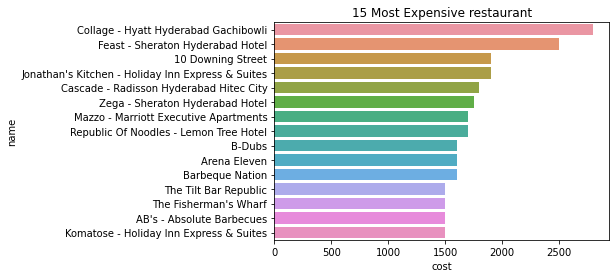

In [604]:
# checking for most expensive Restaurant
sns.barplot(x='cost',
            y="name", 
            data=meta_df, 
            order=meta_df.sort_values('cost',ascending=False).name[:15])

plt.title('15 Most Expensive restaurant')
plt.show()

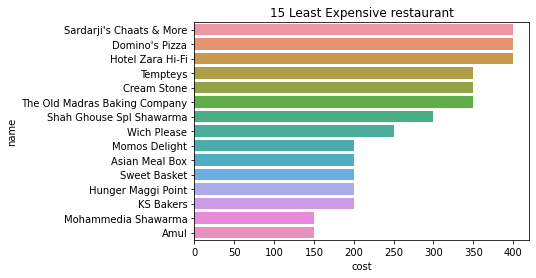

In [605]:
# checking for least expensive Restaurant
sns.barplot(x='cost',
            y="name", 
            data=meta_df, 
            order=meta_df.sort_values('cost',ascending=False).name[-15:])

plt.title('15 Least Expensive restaurant')
plt.show()

In [606]:
#  Creating sparse matrix for cuisine and joining it to meta_df

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

meta_df = meta_df.join(pd.DataFrame.sparse.from_spmatrix(
    
           mlb.fit_transform(meta_df.pop('cuisines')), 
           index=meta_df.index, columns=mlb.classes_ )
                                                        )
meta_df.head()

,name,cost,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,...,NorthIndian,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,Paradise,800,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,Flechazo,1300,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
4,Over The Moon Brew Company,1200,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [607]:
# Most famous cuisine

meta_df.drop(['name','cost'],axis = 1).sum().sort_values(ascending=False)

NorthIndian      60
Chinese          43
Continental      21
Biryani          16
Asian            15
FastFood         15
Italian          14
Desserts         13
SouthIndian       8
Bakery            7
Mughlai           6
American          6
Cafe              6
Kebab             6
Mediterranean     5
Burger            5
Beverages         5
Andhra            5
Salad             5
Momos             4
European          4
Hyderabadi        4
Seafood           4
Sushi             4
Thai              3
StreetFood        2
ModernIndian      2
Japanese          2
IceCream          2
FingerFood        2
BBQ               2
Arabian           2
Mexican           1
Mithai            1
Malaysian         1
Lebanese          1
Juices            1
NorthEastern      1
Indonesian        1
Pizza             1
HealthyFood       1
Goan              1
Spanish           1
Wraps             1
dtype: int64

Text(0, 0.5, 'cuisines')

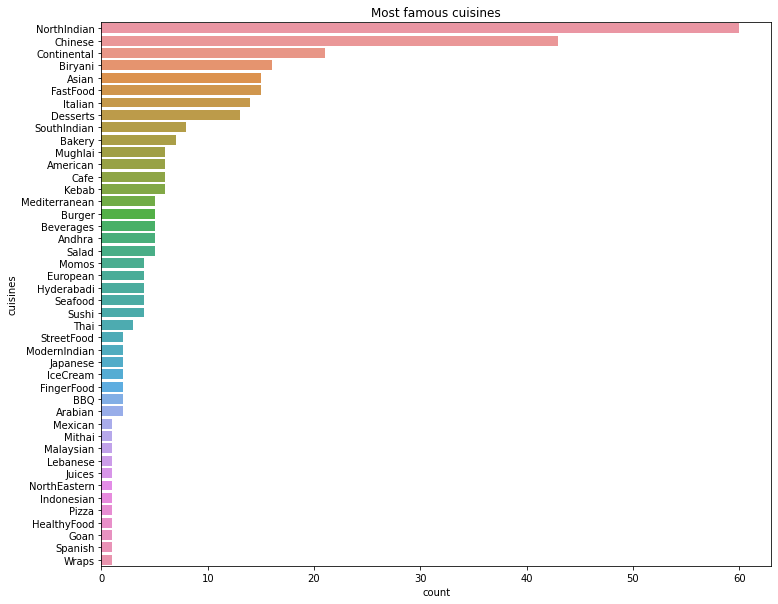

In [608]:
# Most famous cuisine

plt.figure(figsize = (12,10))
sns.barplot(y = meta_df.drop(['name','cost'],axis = 1).sum().sort_values(ascending=False).index,
            x = meta_df.drop(['name','cost'],axis = 1).sum().sort_values(ascending=False))
plt.title('Most famous cuisines')
plt.xlabel('count')
plt.ylabel('cuisines')

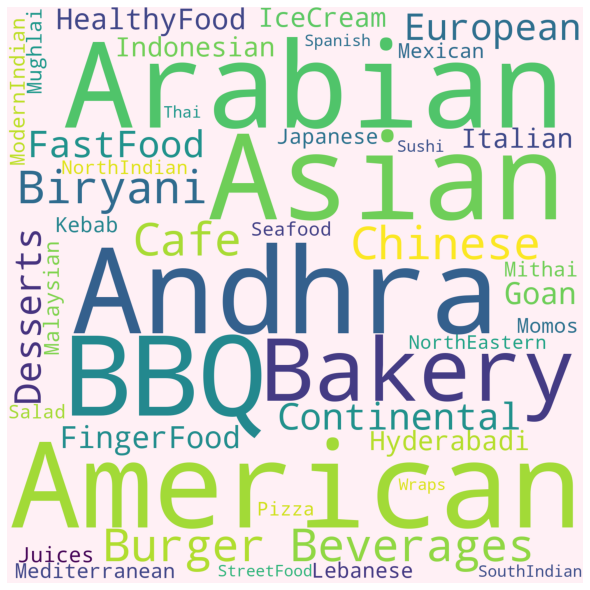

In [609]:
from wordcloud import WordCloud, STOPWORDS
words_list = meta_df.drop(['name','cost'],axis = 1).sum().keys()
strr = ' '
for i in words_list:
    strr=strr+i+' '
    
wordcloud = WordCloud(width = 1400, height = 1400, 
                background_color ='lavenderblush',  
                min_font_size = 12).generate(strr) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Findings:


1.   Customers can choose between different restaurants based on their spending power.
2.   Most customers prefer North Indian and Chinese cuisines.



## review_df

In [610]:
review_df.head()

,restaurant,reviewer,review,rating,pictures,year,month,day,hour,review_number,followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,2019,5,25,15,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,2019,5,25,14,3,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0,2019,5,24,22,2,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,0,2019,5,24,22,1,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,0,2019,5,24,21,3,2.0


In [611]:
# Grouping restaurants according to their ratings

restaurant_ratings = review_df.groupby(['restaurant'])['rating'].mean().sort_values(ascending=False)
restaurant_ratings

restaurant
AB's - Absolute Barbecues         4.880
B-Dubs                            4.810
3B's - Buddies, Bar & Barbecue    4.760
Paradise                          4.700
Flechazo                          4.660
                                  ...  
Behrouz Biryani                   2.825
Mathura Vilas                     2.820
Pakwaan Grand                     2.710
Asian Meal Box                    2.580
Hotel Zara Hi-Fi                  2.400
Name: rating, Length: 100, dtype: float64

Text(0, 0.5, 'Ratings')

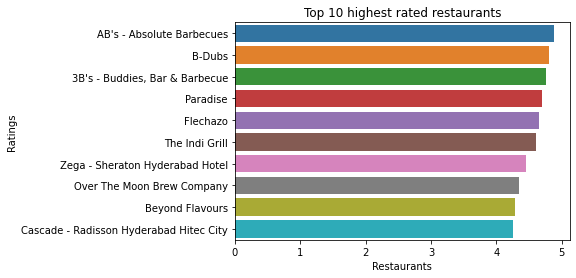

In [612]:
# Top 10 highest rated restaurant

sns.barplot(x = restaurant_ratings[:10], y = restaurant_ratings[:10].index)
plt.title('Top 10 highest rated restaurants')
plt.xlabel('Restaurants')
plt.ylabel('Ratings')

In [613]:
restaurant_ratings.describe()

count    100.000000
mean       3.601929
std        0.508102
min        2.400000
25%        3.245000
50%        3.615000
75%        3.846250
max        4.880000
Name: rating, dtype: float64

Text(0.5, 1.0, 'Distribution of Average Restaurant Ratings')

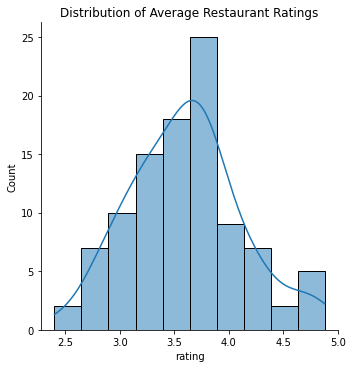

In [614]:
# Distribution of restaurants wrt ratings

sns.displot(x = restaurant_ratings, kde= True)
plt.title('Distribution of Average Restaurant Ratings')

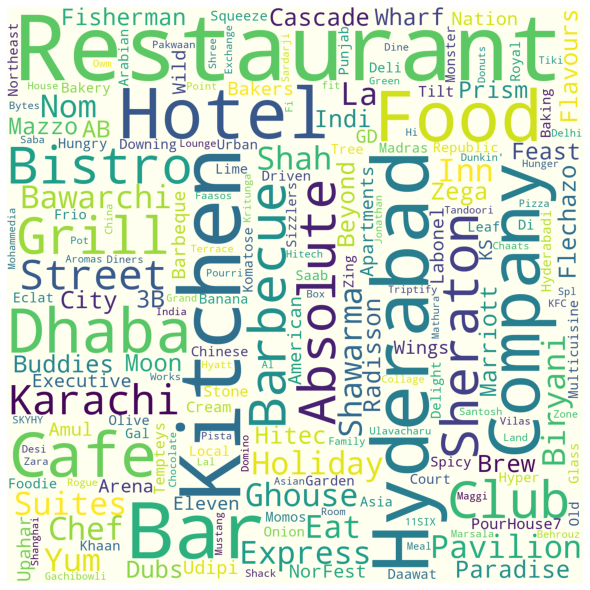

In [615]:
from wordcloud import WordCloud, STOPWORDS
words_list = restaurant_ratings.keys()
strr = ' '
for i in words_list:
    strr=strr+i+' '
    
wordcloud = WordCloud(width = 1400, height = 1400, 
                background_color ='ivory',  
                min_font_size = 12).generate(strr) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [616]:
# Top rated restaurants according to years

restaurant_yearly_ratings = review_df.groupby(['restaurant', 'year'])['rating'].mean().sort_values(ascending=False).reset_index()

In [617]:
# Top rated restaurants in 2019

twenty_nineteen = restaurant_yearly_ratings[restaurant_yearly_ratings.year == 2019].head(10)
twenty_nineteen

,restaurant,year,rating
0,AB's - Absolute Barbecues,2019,4.880000
1,B-Dubs,2019,4.810000
2,"3B's - Buddies, Bar & Barbecue",2019,4.760000
3,Paradise,2019,4.700000
4,Flechazo,2019,4.660000
5,Cascade - Radisson Hyderabad Hitec City,2019,4.641509
7,The Indi Grill,2019,4.600000
8,Karachi Bakery,2019,4.538462
10,Zega - Sheraton Hyderabad Hotel,2019,4.409091
12,Over The Moon Brew Company,2019,4.340000


Text(0, 0.5, 'Restaurants')

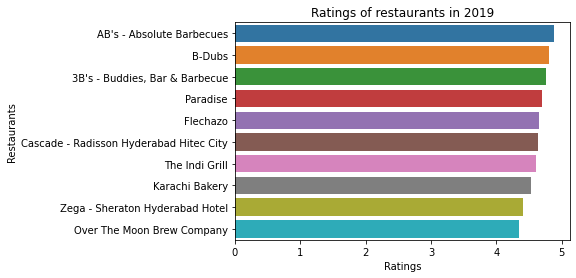

In [618]:
# Lets visualize

sns.barplot(x = twenty_nineteen.rating, y =twenty_nineteen.restaurant)
plt.title('Ratings of restaurants in 2019')
plt.xlabel('Ratings')
plt.ylabel('Restaurants')

In [619]:
# Top rated restaurants in 2018

twenty_eighteen = restaurant_yearly_ratings[restaurant_yearly_ratings.year == 2018].head(10)
twenty_eighteen

,restaurant,year,rating
6,Feast - Sheraton Hyderabad Hotel,2018,4.629630
9,Zega - Sheraton Hyderabad Hotel,2018,4.461538
11,Mazzo - Marriott Executive Apartments,2018,4.375000
14,Hyderabadi Daawat,2018,4.296296
21,Cascade - Radisson Hyderabad Hitec City,2018,4.211538
23,NorFest - The Dhaba,2018,4.166667
25,Barbeque Nation,2018,4.072464
27,Udipi's Upahar,2018,4.055556
31,American Wild Wings,2018,4.000000
32,Amul,2018,3.988095


Text(0, 0.5, 'Restaurants')

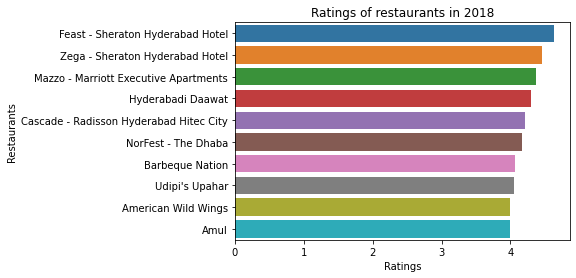

In [620]:
# Lets visualize

sns.barplot(x = twenty_eighteen.rating, y =twenty_eighteen.restaurant)
plt.title('Ratings of restaurants in 2018')
plt.xlabel('Ratings')
plt.ylabel('Restaurants')

In [621]:
twenty_nineteen_df = restaurant_yearly_ratings[restaurant_yearly_ratings.year == 2019]
twenty_eighteen_df = restaurant_yearly_ratings[restaurant_yearly_ratings.year == 2018]

In [622]:
# Restaurant's rating in both year 2018 and 2019

df = twenty_eighteen_df.merge(twenty_nineteen_df, how = 'inner', on = 'restaurant')
df.sort_values(by=['rating_x'], ascending=False, inplace=True)
df

,restaurant,year_x,rating_x,year_y,rating_y
0,Feast - Sheraton Hyderabad Hotel,2018,4.629630,2019,4.068493
1,Zega - Sheraton Hyderabad Hotel,2018,4.461538,2019,4.409091
2,Mazzo - Marriott Executive Apartments,2018,4.375000,2019,4.173913
3,Hyderabadi Daawat,2018,4.296296,2019,3.282609
4,Cascade - Radisson Hyderabad Hitec City,2018,4.211538,2019,4.641509
...,...,...,...,...,...
72,Behrouz Biryani,2018,2.886667,2019,2.640000
73,The Chocolate Room,2018,2.833333,2019,2.818182
74,Hotel Zara Hi-Fi,2018,2.767857,2019,1.931818
75,Asian Meal Box,2018,2.648148,2019,2.500000


It can seen from the table that ratings have decreased from 2018 to 2019 and new restaurants have taken place in position of old restaurant.

In [623]:
# Average rating in all years

review_df.groupby(['year'])['rating'].mean()

year
2016    3.965116
2017    3.805164
2018    3.521650
2019    3.668124
Name: rating, dtype: float64

In [624]:
# Number of restaurants in each year

review_df.groupby(['year'])['restaurant'].nunique()

year
2016      2
2017      8
2018     77
2019    100
Name: restaurant, dtype: int64

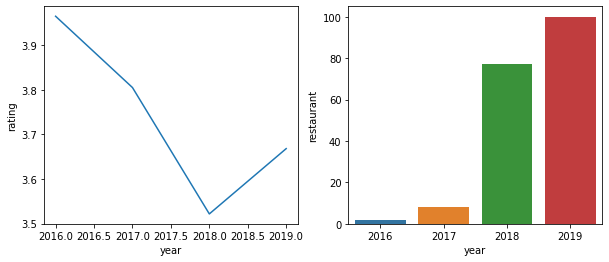

In [625]:
# Visualize
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = [10, 4])
sns.lineplot(y = review_df.groupby(['year'])['rating'].mean(), x = review_df.groupby(['year'])['rating'].mean().index, ax=ax1)
sns.barplot(y = review_df.groupby(['year'])['restaurant'].nunique(), x =review_df.groupby(['year'])['restaurant'].nunique().index, ax=ax2)

From the year 2016 to 2019, the ratings of the restaurants was decreasing but it showing some improvement in the year 2019. It can be mostly adjudged to the increasing number of restaurants being added to zomato. The increased rating in 2019, even with most number of restaurants suggests that the quality of service have been improved.

In [626]:
#create a seperate detaframe for reviewers and their activity
reviewers_df = review_df.groupby(['reviewer','review_number','followers'])['rating'].mean().reset_index()
reviewers_df.sort_values(by=['review_number','followers','rating'],ascending=[False,False,True],inplace=True,ignore_index=True)

#sorting out the crtics of the industry, these are the people with most reviews written and most followers who have given low rating on an avg
reviewers_df.head()

,reviewer,review_number,followers,rating
0,Anvesh Chowdary,1031,1654.0,3.333333
1,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,685,794.0,2.000000
2,Abc098,665,2275.0,3.000000
3,Mithun Ravindranathan,560,2863.0,4.000000
4,Mohd Zubair Ali (Hyderabad.Food.Diaries),482,1688.0,4.000000


Text(0.5, 1.0, 'Critics with most follower')

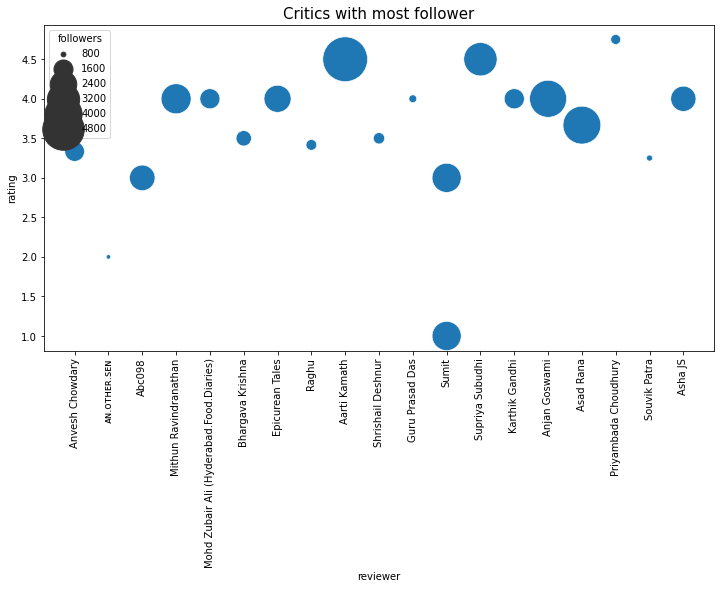

In [627]:
# Visualize

plt.figure(figsize=(12,6))
sns.scatterplot(data=reviewers_df[:20], x="reviewer", y="rating", size="followers",alpha=1, legend=True, sizes=(20, 2000))
plt.xticks(rotation=90)
plt.title('Critics with most follower',size=15)

These are the most frequent reviewer with most number of followers. The restaurants can focus on these individuals to improve their image.

## Merge both dataset

In [628]:
meta_df.rename(columns={"name":"restaurant"}, inplace = True)

In [629]:
# merge both dataset

merge_df = review_df.merge(meta_df, how  = 'outer', on = 'restaurant')
merge_df.head()

,restaurant,reviewer,review,rating,pictures,year,month,day,hour,review_number,...,NorthIndian,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0.0,2019.0,5.0,25.0,15.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0.0,2019.0,5.0,25.0,14.0,3.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0.0,2019.0,5.0,24.0,22.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,0.0,2019.0,5.0,24.0,22.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,0.0,2019.0,5.0,24.0,21.0,3.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [630]:
# null value of cost assigned with mean value and others with 0

merge_df.cost.fillna(merge_df.cost.mean(), inplace = True)
merge_df.fillna(0, inplace = True)

In [631]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9960 entries, 0 to 9959
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype             
---  ------         --------------  -----             
 0   restaurant     9960 non-null   object            
 1   reviewer       9960 non-null   object            
 2   review         9960 non-null   object            
 3   rating         9960 non-null   float64           
 4   pictures       9960 non-null   float64           
 5   year           9960 non-null   float64           
 6   month          9960 non-null   float64           
 7   day            9960 non-null   float64           
 8   hour           9960 non-null   float64           
 9   review_number  9960 non-null   float64           
 10  followers      9960 non-null   float64           
 11  cost           9960 non-null   float64           
 12  American       9960 non-null   Sparse[float64, 0]
 13  Andhra         9960 non-null   Sparse[float64, 0]
 14  Arabian 

In [632]:
# merge meta_df with average restaurant ratings

meta_df = meta_df.merge(restaurant_ratings, how = 'inner', on = 'restaurant')

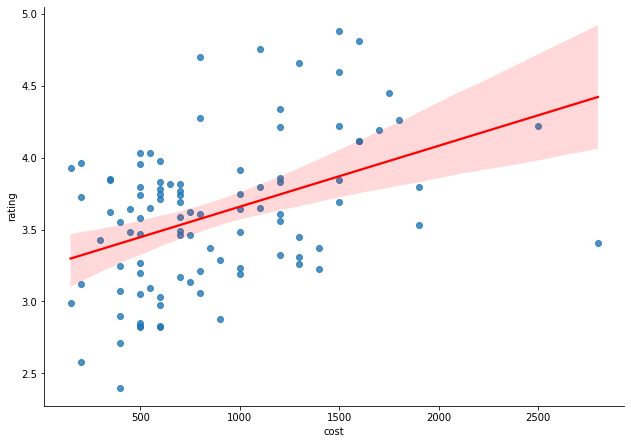

In [633]:
# Relation between cost and rating

sns.lmplot(y='rating',x='cost',data=meta_df,line_kws={'color' :'red'},height=6.27, aspect=11.7/8.27)

It is clearly visible that cost have positive have positive correlation with ratings.

In [634]:
# Restaurant with lowest ratings

low_rating = merge_df.groupby(['restaurant', 'cost'])['rating'].mean().sort_values(ascending=True)
low_rating = low_rating[low_rating != 0]
low_rating

restaurant                      cost  
Hotel Zara Hi-Fi                400.0     2.400
Asian Meal Box                  200.0     2.580
Pakwaan Grand                   400.0     2.710
Mathura Vilas                   500.0     2.820
Behrouz Biryani                 600.0     2.825
                                          ...  
Flechazo                        1300.0    4.660
Paradise                        800.0     4.700
3B's - Buddies, Bar & Barbecue  1100.0    4.760
B-Dubs                          1600.0    4.810
AB's - Absolute Barbecues       1500.0    4.880
Name: rating, Length: 100, dtype: float64

Text(0.5, 1.0, 'Restaurants with Low Ratings')

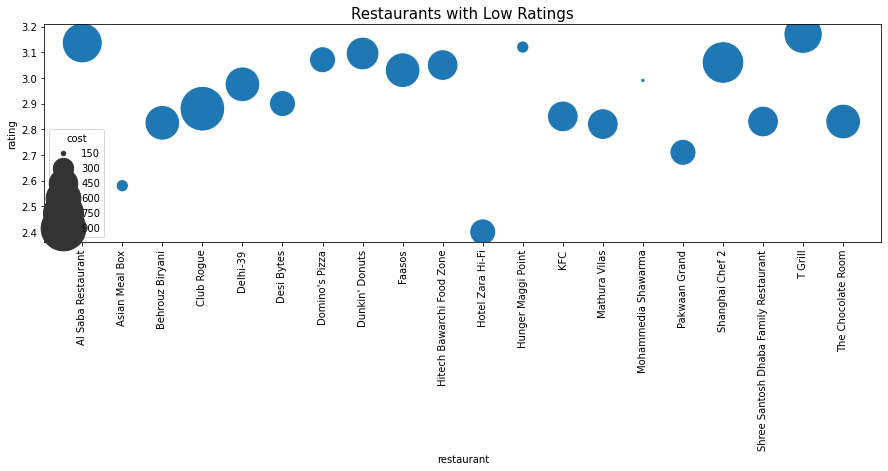

In [635]:
#visualizing the restaurants


plt.figure(figsize=(15,4))
sns.scatterplot(data=low_rating[:20], x="restaurant", y=low_rating, size="cost",alpha=1, legend=True, sizes=(20, 2000))
plt.xticks(rotation=90)
plt.title('Restaurants with Low Ratings',size=15)

These restaurants are basically small food joints or restaurants with high prices according to the food they are serving. Efforts should be made to advertise more and analyze the reviews, especially for these restaurants, and work on them. Mohammedia Shawarma has good rating with the lowest cost. It seems it is doing well in its capacity.

## Hypotheses Generation on visualized data for Clustering

Clustering is done on the basis of similarities between the data points. The similarities are understood by how closely distanced these points are. The following are some hypotheses that can be generated by finding some similarities in the visualized data:

1. Restaurants with similar kinds of ratings can be clustered together. Ratings are done by people on the basis of food quality, service, packaging among other things.

2.   Restaurants with high ratings would also probably be expensive and would be having a similar pricing strategy as well. They can be clustered according to the costs.
3.   Restaurants having some of the most popular cuisines can be clustered together and restaurants with exotic cuisines such as Indonesian, Mexican, Japanese, etc can be clustered as they are really low in number





# **Modelling**

## Feature scaling

In [636]:
# Data scaling

from sklearn.preprocessing import MinMaxScaler

scaled_df = meta_df.copy()
scaler = MinMaxScaler()
scaled_df[['cost', 'rating']] = scaler.fit_transform(scaled_df[['cost', 'rating']])

In [637]:
meta_df.head()

,restaurant,cost,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,...,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps,rating
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,4.28
1,Paradise,800,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.70
2,Flechazo,1300,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.66
3,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,3.21
4,Over The Moon Brew Company,1200,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.34


## **KMeans Clustering on cost and ratings**

In [638]:
# Applying KMeans

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters=i)
  km.fit(scaled_df[['cost', 'rating']])
  wcss.append(km.inertia_)

Text(0, 0.5, 'WCSS')

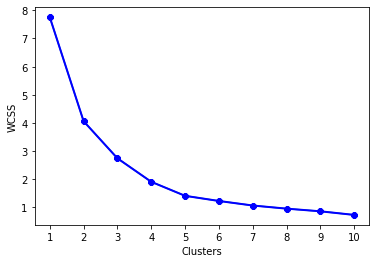

In [639]:
# Plotting the elbow curve

plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="blue", marker ="8")
plt.xlabel("Clusters")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")

In [640]:
# Let's seee the silhouette score

from sklearn.metrics import silhouette_score
silhouette = []
for i in range(2,11):
    model= KMeans(n_clusters=i)
    preds= model.fit_predict(scaled_df[['cost', 'rating']])
    centers= model.cluster_centers_
    
    score = silhouette_score(scaled_df[['cost', 'rating']], preds, metric= 'euclidean')
    print('For cluster={}, the silhouette score is {}'.format(i,score))
    silhouette.append(score)

For cluster=2, the silhouette score is 0.4681227734253803
For cluster=3, the silhouette score is 0.4008569988843416
For cluster=4, the silhouette score is 0.44553802596530934
For cluster=5, the silhouette score is 0.4645049754553133
For cluster=6, the silhouette score is 0.4200549445708087
For cluster=7, the silhouette score is 0.3864833954993431
For cluster=8, the silhouette score is 0.37098251043069386
For cluster=9, the silhouette score is 0.33976918743409706
For cluster=10, the silhouette score is 0.3443621825064386


Text(0, 0.5, 'Silhouette score')

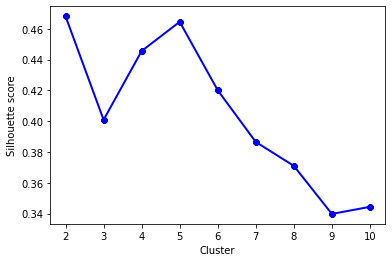

In [641]:
plt.plot(range(2, 11) , silhouette, linewidth=2, color="blue", marker ="8")
plt.xlabel('Cluster')
plt.ylabel('Silhouette score')

it's difficult to guess from elbow curve but silhouette score suggests the optimal number of clusters = 5. Even though cluster = 2 have the maximum silhouette score but will make the clustering too simple.

In [642]:
# Creating a new dataframe

data_with_clusters = scaled_df[['cost', 'rating']].copy()

In [643]:
# Kmeans using cluster = 5

km2 = KMeans(n_clusters = 5)
pred = km2.fit_predict(data_with_clusters)
data_with_clusters['labels'] = pred

In [644]:
data_with_clusters.head()

,cost,rating,labels
0,0.245283,0.758065,0
1,0.245283,0.927419,3
2,0.433962,0.911290,3
3,0.245283,0.326613,4
4,0.396226,0.782258,3


Text(0, 0.5, 'Rating')

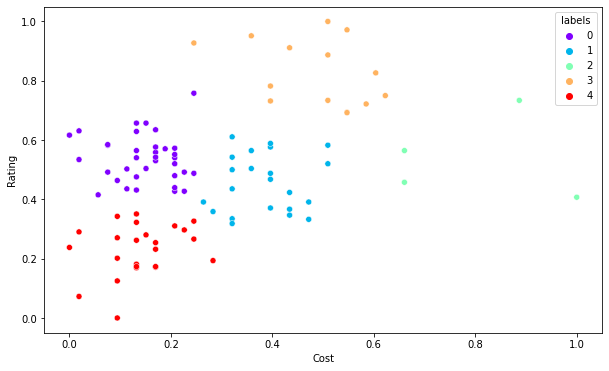

In [645]:
# Plot the clusters

plt.figure(figsize=[10, 6])
sns.scatterplot(x = data_with_clusters['cost'], y = data_with_clusters['rating'], hue = data_with_clusters['labels'], palette='rainbow', legend = 'full')
plt.xlabel('Cost')
plt.ylabel('Rating')

The clusters are pretty distinguishable from each other. Since the input variables were just two, it is easier to distinguish and interpret them.



*   Class 1 represents restaurants with the lowest rating and with the lowest cost.
*   Class 2 represents restaurants with the lowest rating and with the medium cost.

*   Class 3 represents restaurants with the medium rating and with the medium cost.
*   Class 0 represents restaurants with the medium rating and with the highest cost.

*   Class 4 represents restaurants with the highest rating and with the highest cost.

The cluster point are very close to each other so let's try different clustering technique. Principal Component Analysis can reduce the features and also speed up th process.


In [649]:
scaled_df = scaled_df.set_index('restaurant')

In [650]:
#principal component analysis
from sklearn.decomposition import PCA

#choosing 3 components
pca = PCA(n_components=3)

#fitting pca
pca_result = pca.fit_transform(scaled_df)

#variance ratio
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.18699092 0.12274429 0.07138237]
Cumulative variance explained by 3 principal components: 38.11%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


PCA 1 contains 18%, PCA 2 contains 12%  and PC 3 contains 7% of the information. Thus, a total of 38% of the information is contained in the pca analysis.

In [651]:
# Dataframe to store PCA components

pca_df = pd.DataFrame(pca_result, columns = ['PC1', 'PC2', 'PC3'], index = meta_df.index)
pca_df.head()

,PC1,PC2,PC3
restaurant,,,
Beyond Flavours,-0.865971,0.443741,-0.236328
Paradise,-0.785799,-0.537356,0.102499
Flechazo,0.261207,0.417260,-0.330358
Shah Ghouse Hotel & Restaurant,-0.781544,-0.735570,0.159528
Over The Moon Brew Company,-0.714331,0.780477,0.374780


In [652]:
#fit predict kmeans 
pred_pca = km2.fit_predict(pca_result)
pca_df["labels"] = pred_pca

Text(0.5, 0, 'PC3')

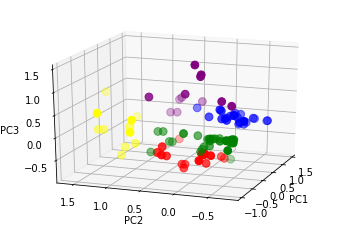

In [653]:
#plotting 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df.PC1[pca_df["labels"] == 0], pca_df.PC2[pca_df["labels"] == 0], pca_df.PC3[pca_df["labels"] == 0], c='purple', s=60)
ax.scatter(pca_df.PC1[pca_df["labels"] == 1], pca_df.PC2[pca_df["labels"] == 1], pca_df.PC3[pca_df["labels"] == 1], c='red', s=60)
ax.scatter(pca_df.PC1[pca_df["labels"] == 2], pca_df.PC2[pca_df["labels"] == 2], pca_df.PC3[pca_df["labels"] == 2], c='blue', s=60)
ax.scatter(pca_df.PC1[pca_df["labels"] == 3], pca_df.PC2[pca_df["labels"] == 3], pca_df.PC3[pca_df["labels"] == 3], c='green', s=60)
ax.scatter(pca_df.PC1[pca_df["labels"]== 4], pca_df.PC2[pca_df["labels"] == 4], pca_df.PC3[pca_df["labels"] == 4], c='yellow', s=60)
ax.scatter(pca_df.PC1[pca_df["labels"]== 5], pca_df.PC2[pca_df["labels"] == 5], pca_df.PC3[pca_df["labels"] == 5], c='black', s=60)
ax.view_init(20, 200)
plt.xlabel("PC1")
plt.ylabel("PC2")
ax.set_zlabel('PC3')

### Some analysis on clusters

In [654]:
# Let's join cluster labels to meta_df

cluster_df = meta_df.join(pca_df['labels'])
cluster_df.head()

,cost,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,...,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps,rating,labels
restaurant,,,,,,,,,,,,,,,,,,,,,
Beyond Flavours,800,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,4.28,3
Paradise,800,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,4.70,3
Flechazo,1300,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.66,1
Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,3.21,3
Over The Moon Brew Company,1200,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.34,4


In [655]:
# Number of observations for each cluster

cluster_df.labels.value_counts()

3    32
2    26
1    18
0    12
4    11
Name: labels, dtype: int64

**Cluster 0**

In [656]:
# explore cluster 0

cluster_df[['cost', 'rating', 'labels']][cluster_df.labels == 0].describe()

,cost,rating,labels
count,12.000000,12.000000,12.0
mean,1029.166667,3.651887,0.0
std,440.793877,0.565097,0.0
min,200.000000,2.580000,0.0
25%,787.500000,3.357500,0.0
50%,1000.000000,3.635000,0.0
75%,1275.000000,3.901912,0.0
max,1750.000000,4.600000,0.0


In [905]:
def cluster_cuisine(df):
  cuisine_dict = {}
  key = []
  for col in df.columns:
    freq_df = pd.crosstab(index = cluster_df[col], columns = 'sum')
    pf = freq_df.drop([0])
    key.append((pf.loc[:,'sum']))
  cuisine_dict = dict(list(zip(df.columns, key)))
  return cuisine_dict


In [959]:
df = cluster_cuisine(cluster_df[cluster_df.labels == 0].drop(['cost', 'rating', 'labels'], axis = 1))
df

{'American': American
 1    6
 Name: sum, dtype: int64, 'Andhra': Andhra
 1    5
 Name: sum, dtype: int64, 'Arabian': Arabian
 1    2
 Name: sum, dtype: int64, 'Asian': Asian
 1    14
 Name: sum, dtype: int64, 'BBQ': BBQ
 1    2
 Name: sum, dtype: int64, 'Bakery': Bakery
 1    6
 Name: sum, dtype: int64, 'Beverages': Beverages
 1    5
 Name: sum, dtype: int64, 'Biryani': Biryani
 1    15
 Name: sum, dtype: int64, 'Burger': Burger
 1    5
 Name: sum, dtype: int64, 'Cafe': Cafe
 1    6
 Name: sum, dtype: int64, 'Chinese': Chinese
 1    41
 Name: sum, dtype: int64, 'Continental': Continental
 1    21
 Name: sum, dtype: int64, 'Desserts': Desserts
 1    13
 Name: sum, dtype: int64, 'European': European
 1    4
 Name: sum, dtype: int64, 'FastFood': FastFood
 1    13
 Name: sum, dtype: int64, 'FingerFood': FingerFood
 1    2
 Name: sum, dtype: int64, 'Goan': Goan
 1    1
 Name: sum, dtype: int64, 'HealthyFood': HealthyFood
 1    1
 Name: sum, dtype: int64, 'Hyderabadi': Hyderabadi
 1    4
 N

In [956]:
sq = []
for i in df.values():
  
  k = list(i)
  for j in k:
    sq.append(j)
new_df = dict(list(zip(df.keys(), sq)))

In [958]:
new_df

{'American': 6,
 'Andhra': 5,
 'Arabian': 2,
 'Asian': 14,
 'BBQ': 2,
 'Bakery': 6,
 'Beverages': 5,
 'Biryani': 15,
 'Burger': 5,
 'Cafe': 6,
 'Chinese': 41,
 'Continental': 21,
 'Desserts': 13,
 'European': 4,
 'FastFood': 13,
 'FingerFood': 2,
 'Goan': 1,
 'HealthyFood': 1,
 'Hyderabadi': 4,
 'IceCream': 2,
 'Indonesian': 1,
 'Italian': 14,
 'Japanese': 2,
 'Juices': 1,
 'Kebab': 6,
 'Lebanese': 1,
 'Malaysian': 5,
 'Mediterranean': 1,
 'Mexican': 2,
 'Mithai': 4,
 'ModernIndian': 6,
 'Momos': 1,
 'Mughlai': 59,
 'NorthEastern': 1,
 'NorthIndian': 4,
 'Pizza': 4,
 'Salad': 8,
 'Seafood': 1,
 'SouthIndian': 2,
 'Spanish': 4,
 'StreetFood': 2,
 'Sushi': 1}

In [657]:
# explore cluster 1

cluster_df[['cost', 'rating', 'labels']][cluster_df.labels == ].describe()

,cost,rating,labels
count,18.000000,18.000000,18.0
mean,972.222222,3.724167,1.0
std,460.250003,0.564421,0.0
min,400.000000,2.880000,1.0
25%,512.500000,3.315000,1.0
50%,1000.000000,3.555000,1.0
75%,1300.000000,3.972500,1.0
max,1900.000000,4.880000,1.0


In [658]:
# explore cluster 2

cluster_df[['cost', 'rating', 'labels']][cluster_df.labels == 2].describe()

,cost,rating,labels
count,26.000000,26.000000,26.0
mean,513.461538,3.566693,2.0
std,298.850361,0.471480,0.0
min,150.000000,2.825000,2.0
25%,350.000000,3.101250,2.0
50%,500.000000,3.682500,2.0
75%,600.000000,3.848750,2.0
max,1600.000000,4.810000,2.0


In [659]:
# explore cluster 3

cluster_df[['cost', 'rating', 'labels']][cluster_df.labels == 3].describe()

,cost,rating,labels
count,32.000000,32.000000,32.0
mean,790.625000,3.415038,3.0
std,363.548262,0.470633,0.0
min,400.000000,2.400000,3.0
25%,500.000000,3.161591,3.0
50%,700.000000,3.415000,3.0
75%,925.000000,3.702500,3.0
max,1900.000000,4.700000,3.0


In [660]:
# explore cluster 4

cluster_df[['cost', 'rating', 'labels']][cluster_df.labels == 4].describe()

,cost,rating,labels
count,11.000000,11.000000,11.0
mean,1618.181818,4.000000,4.0
std,558.244000,0.305786,0.0
min,1200.000000,3.410000,4.0
25%,1200.000000,3.837500,4.0
50%,1500.000000,4.190000,4.0
75%,1750.000000,4.220000,4.0
max,2800.000000,4.340000,4.0
